In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

# Reader

In [34]:
#file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_2.scan"    # series config, read S11 and S21
file_path = "/home/cmsdaq/Analysis/Data/Test/BAW_6_30.scan"
#file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_1.scan"    # parallel config, read B
#file_path = "/home/cmsdaq/Analysis/Data/RUN_5/processed_data/BAW_5_8.scan"    # VNA 3 porte, 0-20 MHz
reader = scan_handler.ScanReader(file_path)        # create the object

In [35]:
reader.get_resonances_list()

['resonance_1',
 'resonance_10',
 'resonance_100',
 'resonance_101',
 'resonance_102',
 'resonance_103',
 'resonance_104',
 'resonance_105',
 'resonance_106',
 'resonance_107',
 'resonance_108',
 'resonance_109',
 'resonance_11',
 'resonance_110',
 'resonance_111',
 'resonance_112',
 'resonance_113',
 'resonance_114',
 'resonance_115',
 'resonance_116',
 'resonance_117',
 'resonance_118',
 'resonance_119',
 'resonance_12',
 'resonance_120',
 'resonance_121',
 'resonance_122',
 'resonance_123',
 'resonance_124',
 'resonance_125',
 'resonance_126',
 'resonance_127',
 'resonance_128',
 'resonance_129',
 'resonance_13',
 'resonance_130',
 'resonance_131',
 'resonance_132',
 'resonance_133',
 'resonance_134',
 'resonance_135',
 'resonance_136',
 'resonance_137',
 'resonance_138',
 'resonance_139',
 'resonance_14',
 'resonance_140',
 'resonance_141',
 'resonance_142',
 'resonance_143',
 'resonance_144',
 'resonance_145',
 'resonance_146',
 'resonance_147',
 'resonance_148',
 'resonance_149',

In [36]:
# get the name list of all the resonances parameters 
print(reader.get_parameters_tags())

['C_baw', 'L_baw', 'Q', 'Qcorr', 'R_baw', 'R_par', 'asim', 'bw', 'depth', 'er_Q', 'er_asim', 'er_f0', 'er_gamma', 'er_norm', 'f0', 'fcenter', 'fmax', 'fmin', 'gamma', 'input_power', 'norm', 'npt', 'offset_at_peak', 'span', 'sweep', 'x']


In [37]:
# get the parameter Q for all the resonances as an array
R = reader.get_parameters('f0')
print(np.sort(R))

[-2.         -2.         -2.         -2.         -2.         -2.
 -2.         -2.         -2.          1.23444038  1.30855542  1.55152705
  1.7511529   1.75949596  1.83214969  1.86780112  1.89705313  1.96504655
  2.12134571  2.23965544  2.51443217  2.54006832  2.59907762  2.63818707
  2.74709719  2.98858549  3.00462846  3.06900905  3.09846605  3.110143
  3.13232073  3.15264055  3.17989925  3.21799595  3.22953279  3.23018636
  3.23511143  3.44476731  3.84178703  3.90831106  3.91926534  3.95249776
  4.31724663  4.54175094  4.69825942  4.75986131  4.76742844  4.93978805
  4.9959226   4.99993745  5.00025137  5.08717095  5.09036888  5.09423723
  5.174416    5.18157784  5.18389669  5.18986838  5.2380539   5.26139003
  5.28741101  5.3574014   5.4775164   5.54836287  5.56090698  5.57436319
  5.62231813  5.65819891  5.67254966  5.69814979  5.72432263  5.7255842
  5.7448      5.8704241   5.970575    6.10362519  6.14359893  6.30737263
  6.92201516  7.12043627  7.13932069  7.31101741  7.33934797  

In [38]:
# get (as a python dictionary) all the resonance parameter. 
# you can get a resonance from its raw name
#           reader.get_resonance(name="resonance_10")
# you can get a resonance from its position inside the .scan
# e.g.: get the seventh resonance
#           reader.get_resonance(loc=7)
# you can get the resonance from its frequency (the middle frequency). 
# it gets the closest resonance to the selected frequency

resonance = reader.get_resonance(freq=5.8e6, label="S21")

In [39]:
for key in resonance.keys():
    print(key)
print("The resonance called ",resonance['reso_name'] ," has a Q = ", resonance['Q'])

C_baw
L_baw
Q
Qcorr
R_baw
R_par
asim
bw
depth
er_Q
er_asim
er_f0
er_gamma
er_norm
f0
fcenter
fmax
fmin
gamma
input_power
norm
npt
offset_at_peak
span
sweep
x
freq
phase
power
reso_name
The resonance called  resonance_837  has a Q =  4210575.140298327


## Useful(?) examples

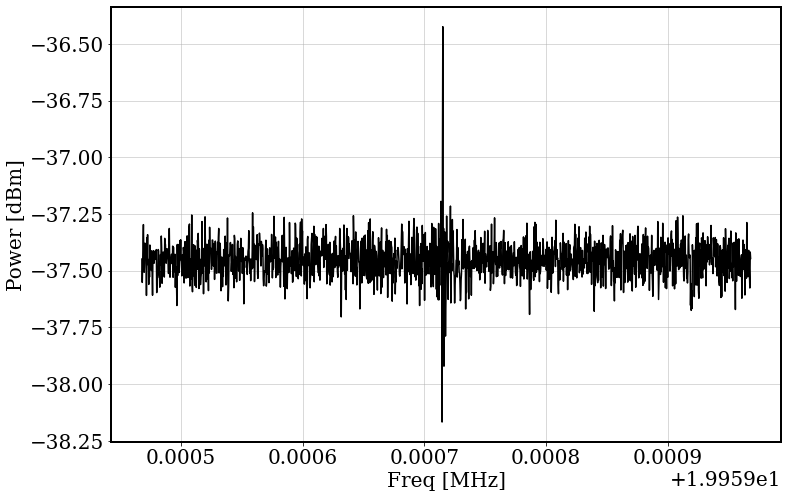

In [16]:
# plot the resonance at 5.66 MHz
reso = reader.get_resonance(freq=5.66e6, label="S21")

plt.plot(reso['freq']*1e-6,reso['power'],c='k')
plt.xlabel('Freq [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

In [17]:
print(reso['R_baw'])
print(reso['R_par'])
print(reso['x'])

print(reso['depth'])


print(reso['C_baw'])
print(reso['L_baw'])

print(reso['f0'])

-14372.627367196448
50.17454898014912
0.2508719832193964
-0.015121543858491626
-3.8718556674046846e-20
-1642.148495602574
19.959715121863244


conversion is: dBm-W
Parametro  1 :  1.8326298239190717e-11  +/-  1.486739154888258e-11
Parametro  2 :  2.5501394331252242e-06  +/-  2.1665106794102365e-06
Parametro  3 :  19.95972952114412  +/-  2.8906499918103713e-06
Parametro  4 :  -0.00028969920318630934  +/-  0.0006104837517394436
Parametro  5 :  0.005962259341138224  +/-  0.012185083231016495
Parametro  6 :  1.5566704504040758  +/-  3.682121543224213
Q = 3.91e+06  +/-  0.5667631256279702


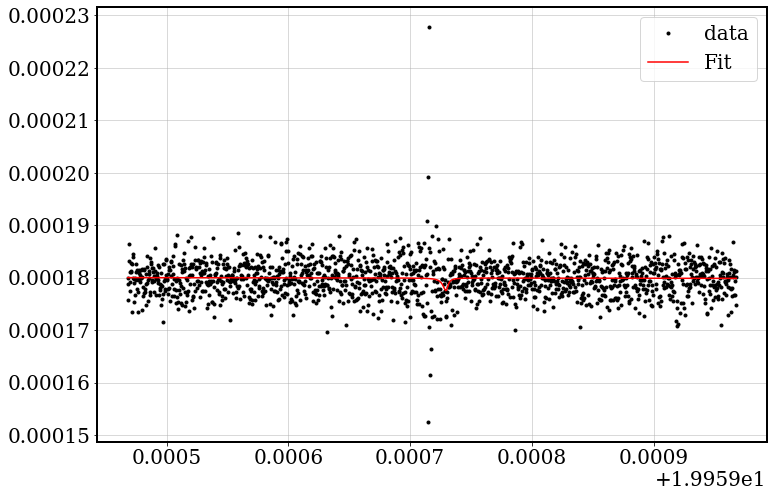

In [18]:
from process import utils
utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)


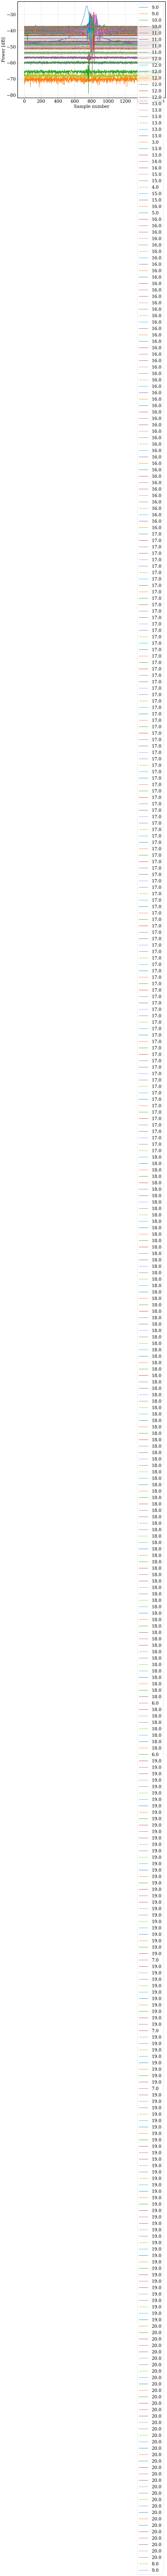

In [20]:
from process import utils

# plot all the resonance with a Q greater than 1e7
Q = reader.get_parameters('Q')
loc = np.where(Q>3e6)[0]

for l in loc:
    power = reader.get_resonance(loc=l, label="S21")['power']
    freq = reader.get_resonance(loc=l, label="S21")['freq']
    f0 = reader.get_resonance(loc=l, label="S21")['f0']
    
    #utils.fit_resonance(freq*1e-6, power,verbose=True)
    
    plt.plot(power,label=str(np.round(f0)))
    
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dB]')
plt.grid(alpha=0.6)
plt.show()

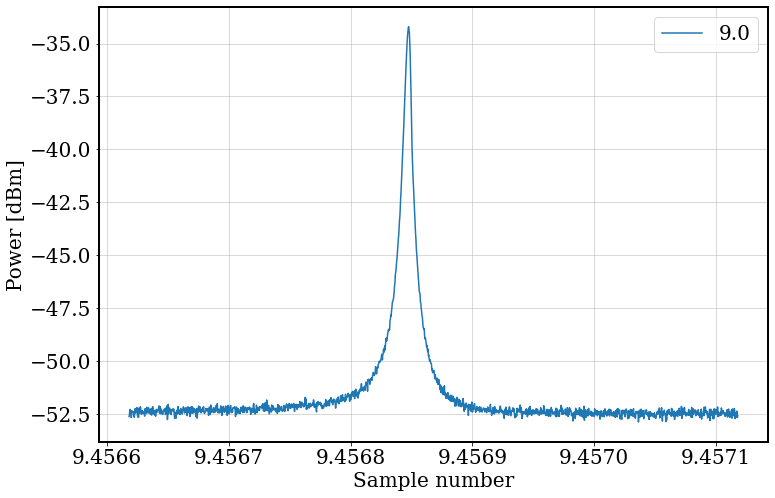

conversion is: dBm-W
Parametro  1 :  -2.5694369691928865e-09  +/-  4.94586346873584e-12
Parametro  2 :  2.2651432304000393e-06  +/-  4.481723567650276e-09
Parametro  3 :  9.456847754433678  +/-  5.843956376935518e-09
Parametro  4 :  -0.0006000713152742088  +/-  0.0002154762968703806
Parametro  5 :  0.005680371333222624  +/-  0.0020377312079828897
Parametro  6 :  1.6115836628512  +/-  0.008784429350647611
Q = 2.09e+06  +/-  0.0012899750219997203


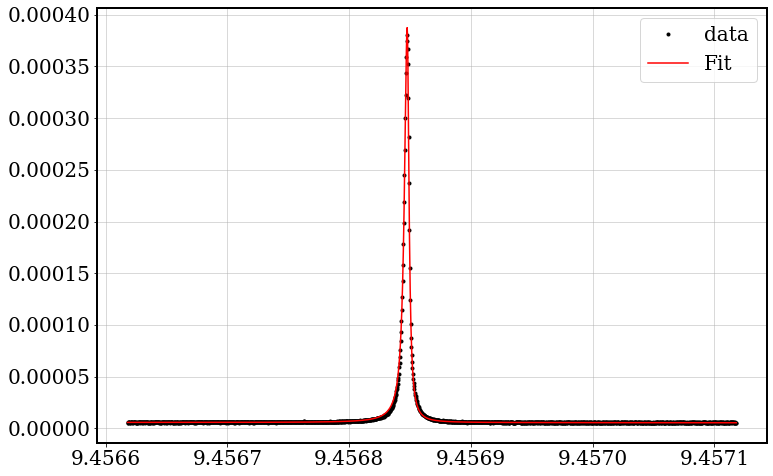

In [23]:
reso = reader.get_resonance(loc=38, label="S21")

plt.plot(reso['freq']*1e-6, reso['power'],label=str(np.round(f0)))

plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)



345
7.959248260302577
conversion is: dBm-W
Parametro  1 :  -3.41031275669714e-06  +/-  2.47343729667248e-09
Parametro  2 :  3.1008075786358776e-06  +/-  2.8886941923436088e-09
Parametro  3 :  4.999914379938463  +/-  3.762843312413367e-09
Parametro  4 :  -0.7592824730751192  +/-  0.11019207040429034
Parametro  5 :  3.7963386795962455  +/-  0.5509536345107253
Parametro  6 :  1.2505922365004558  +/-  0.003073658284587435
Q = 8.06e+05  +/-  0.000606752147140514


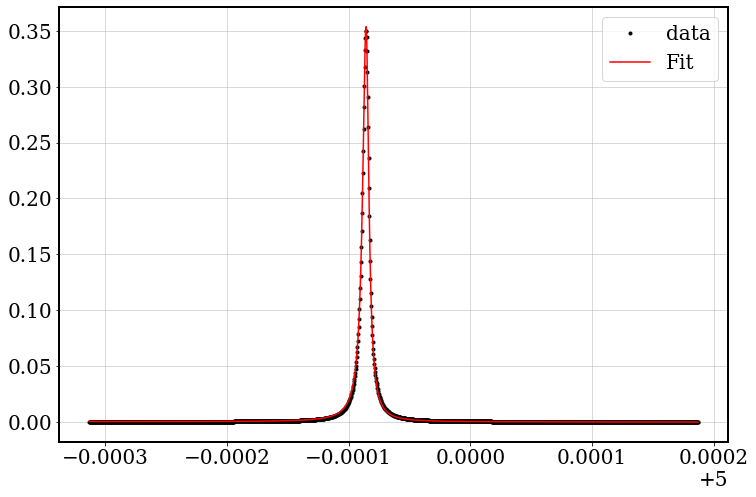

356
7.957259210096931
conversion is: dBm-W
Parametro  1 :  -3.3946316746855376e-06  +/-  2.876017479564636e-09
Parametro  2 :  3.0972196893552777e-06  +/-  3.310754348440175e-09
Parametro  3 :  4.999914308298025  +/-  4.274267121757225e-09
Parametro  4 :  -3.027085689975531  +/-  0.12723186313487522
Parametro  5 :  15.13543428802935  +/-  0.6361610354620977
Parametro  6 :  1.2777531188781843  +/-  0.0035801354047591007
Q = 8.07e+05  +/-  0.0006900167812518743


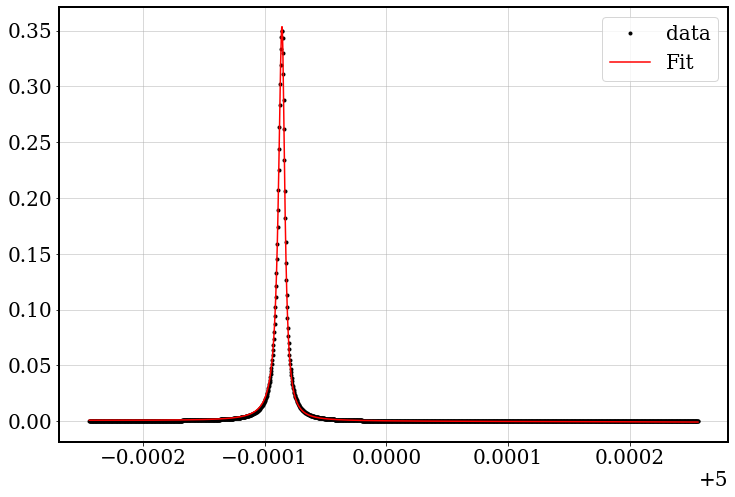

489
8.400604803664836
conversion is: dBm-W
Parametro  1 :  -3.0137221800072337e-06  +/-  3.2411417171343362e-09
Parametro  2 :  2.577767707052699e-06  +/-  3.3755556241385775e-09
Parametro  3 :  5.477276337636889  +/-  4.397867521144647e-09
Parametro  4 :  -0.7091662805343434  +/-  0.15182377241492992
Parametro  5 :  3.8842700613322347  +/-  0.8315846200869749
Parametro  6 :  1.3481587732827942  +/-  0.004702864004101106
Q = 1.06e+06  +/-  0.0008530379811013409


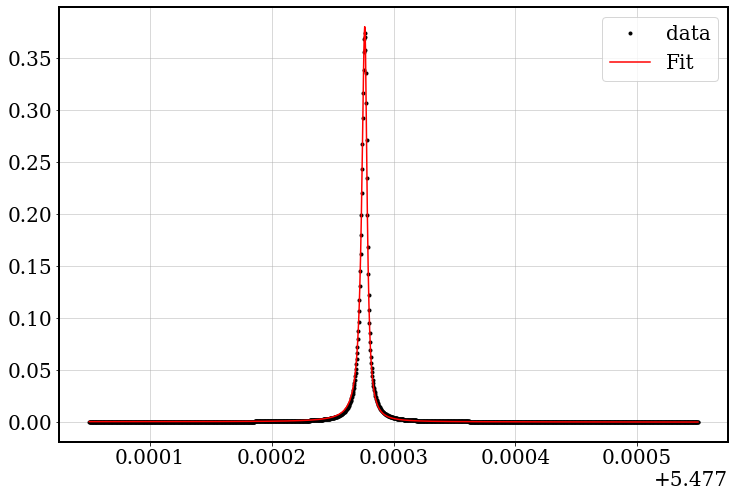

In [27]:
#Q = np.sort(reader.get_parameters('Q'))[-1]
#print(Q)
Q = reader.get_parameters('Q')
f = reader.get_parameters('f0')
d = reader.get_parameters('depth')

loc = np.intersect1d(np.where(d>7)[0], np.where(d > 0.05)[0])

#loc = np.where(f>17)[0]

for l in loc:
    print(l)

    power = reader.get_resonance(loc=l, label="S21")['power']
    freq = reader.get_resonance(loc=l, label="S21")['freq']

    print(d[l])
    utils.fit_resonance(freq*1e-6, power, verbose=True)



conversion is: dBm-W
Parametro  1 :  -3.688398352696137e-09  +/-  1.6706331463660364e-12
Parametro  2 :  8.594173086369772e-06  +/-  5.139442140019427e-09
Parametro  3 :  8.669158401087874  +/-  6.520729516126342e-09
Parametro  4 :  -0.000901599671424097  +/-  4.454711477757724e-05
Parametro  5 :  0.007820284879409275  +/-  0.00038618725832033465
Parametro  6 :  1.1063824038057577  +/-  0.0016911090612715962
Q = 5.04e+05  +/-  0.0003793692220645468


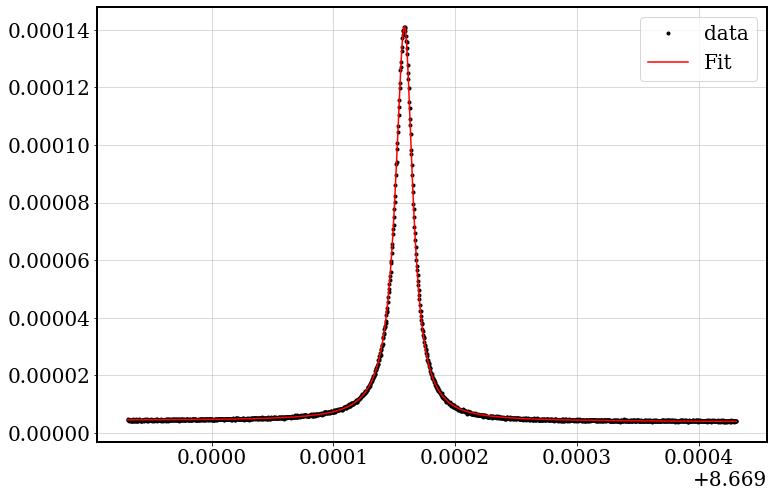

In [29]:
index = 4
power = reader.get_resonance(loc=index, label="S21")['power']
freq = reader.get_resonance(loc=index, label="S21")['freq']
utils.fit_resonance(freq*1e-6, power, verbose=True)

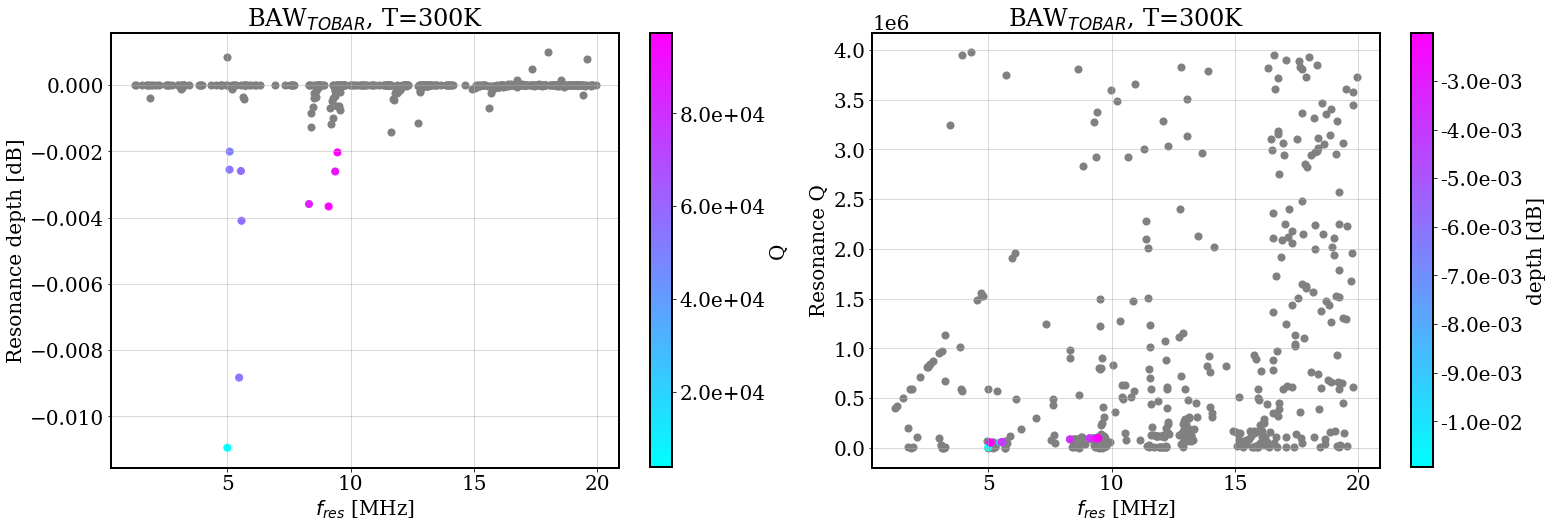

In [42]:
from matplotlib  import cm
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')


depth_thr = 0.0015 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where((Q != -2) & (Q < 4e6) )[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(25)

d = ax1.scatter(peak_pos[ii2],-depth[ii2],s=50,          marker = 'o', color='grey')
d = ax1.scatter(peak_pos[ii], -depth[ii], s=50, c=Q[ii], marker = 'o', cmap = cm.cool )
ax1.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(d,label='Q',format='%.1e', ax=ax1)
ax1.set_xlabel(r'$f_{res}$ [MHz]')
ax1.set_ylabel('Resonance depth [dB]')

e = ax2.scatter(peak_pos[ii2],Q[ii2],s=50,marker='o',color='grey')
e = ax2.scatter(peak_pos[ii], Q[ii],s=50, c=-depth[ii], marker = 'o', cmap = cm.cool )
ax2.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(e,label='depth [dB]',format='%.1e', ax=ax2)
ax2.set_xlabel(r'$f_{res}$ [MHz]')
ax2.set_ylabel('Resonance Q')

ax1.grid(alpha=0.6)
ax2.grid(alpha=0.6)

#plt.savefig('Scan_22.png')
plt.show()

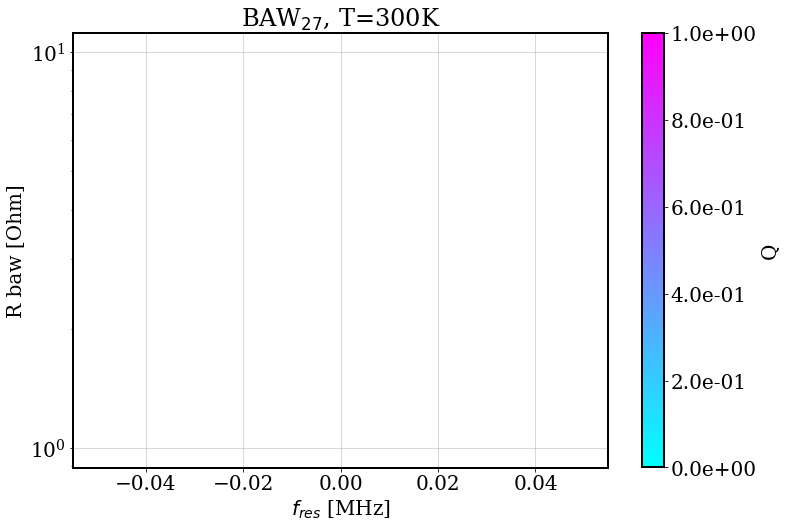

In [15]:
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')
R = reader.get_parameters('R_baw')
C = reader.get_parameters('C_baw')
L = reader.get_parameters('L_baw')

depth_thr = 0.02 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where(Q > 1e6)[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig = plt.figure()
ax = fig.add_subplot(111)
#d =ax.scatter(peak_pos[ii2],R[ii2],s=50,marker='o',color='grey')
d =ax.scatter(peak_pos[ii],R[ii],s=50,c=Q[ii], marker = 'o', cmap = cm.cool )

plt.title(r'BAW$_{27}$, T=300K')
plt.colorbar(d,label='Q',format='%.1e')
plt.xlabel(r'$f_{res}$ [MHz]')
plt.ylabel('R baw [Ohm]')
plt.grid(alpha=0.6)
plt.yscale('log')
#plt.savefig('Scan_22.png')
plt.show()

